# Exploring multiclass classification algoritms on 'Correlation between posture and personality trait' data set

## Introduction:
Occupational back pain is a disorder that commonly affects the working population, resulting in disability, health-care utilization, and a heavy socioeconomic burden. Although the etiology of occupational pain remains largely unsolved, anecdotal evidence exists for the contribution of personality and posture to long-term pain management, pointing to a direct contribution of the mind-body axis. In the current study, we have conducted an extensive evaluation into the relationships between posture and personality.

The results from the personality inventory (MBTI) came in the form of a combination of letters: Extraversion, Introversion, Sensing, Intuition, Thinking, Feeling, Judging, and Perceiving, and numbers, 1–26.

The pain scale data consisted of a number between 0(low) to 10 (high).

Posture - ideal posture (A), kyphosis-lordosis (B), flat back (C), sway-back (D)

### Information about the data set:
I recently took an online '16 personalities test' and discovered a related data set on Kaggle that sparked my interest. I wondered if there was any correlation between personality traits and posture. My results showed that I am an introverted ISFJ. Good posture is crucial in how we are perceived by others, particularly for individuals like myself who work asb a model. This is why I decided to delve into this data set and examine the relationship between posture and personality traits.

### Aims of the project:
In this project I would like to explore various approaches in creating a multiclass classification model. I will attempt to predict the posture type based on the various features, including MBTI personality trait. 

### Data limitation:
The data set used in this project is really small, with only 20 columns and 97 rows. The size of it may affect the performance and accuracy of the model. However, I decided to explore this data set anyway since it is interesting to me. 

### Ethics of the data:
The data set was published on Kaggle, which means that it is publicly accessible and can be downloaded and used in data science projects by anyone. All references about the data set will be provided in the end of the notebook. 

In [2]:
# importing essential liblaries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style='darkgrid')

I downloaded the dataset and saved it as 'postire.csv' on my computer.  

In [3]:
df = pd.read_csv('posture.csv')

Let's check the dataset. 

In [4]:
df

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,B
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,B
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,ESFJ,11,10,22,14,8,16,14,8,B


In [5]:
df.describe()

,S No,AGE,HEIGHT,WEIGHT,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
count,97.000000,97.000000,97.000000,97.00000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,43.855670,65.731959,159.43299,2.139175,3.747423,1.943299,2.530928,12.690722,8.288660,15.134021,11.041237,10.505155,13.443299,10.319588,11.680412
std,28.145456,16.776093,3.737522,36.19591,2.572635,3.191071,2.587909,3.111483,5.717956,5.697146,4.833970,4.732242,5.332924,5.297344,5.727395,5.711003
min,1.000000,11.000000,58.000000,68.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,1.000000,0.000000,2.000000,0.000000,2.000000
25%,25.000000,30.000000,63.000000,135.00000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,12.000000,7.000000,6.000000,10.000000,5.000000,6.000000
50%,49.000000,45.000000,66.000000,157.00000,1.000000,3.000000,0.500000,0.000000,13.000000,8.000000,15.000000,11.000000,11.000000,13.000000,11.000000,11.000000
75%,73.000000,56.000000,68.000000,183.00000,4.000000,7.000000,3.500000,5.000000,18.000000,13.000000,19.000000,14.000000,14.000000,18.000000,16.000000,17.000000
max,97.000000,82.000000,74.000000,263.00000,9.500000,10.000000,10.000000,10.000000,21.000000,19.000000,25.000000,21.000000,22.000000,24.000000,20.000000,22.000000


By looking at the table above, there is nothing suspicious about the data set. 
Let's have a look and check if there are any missing values.

In [6]:
df.isnull().any()

S No              False
AGE               False
HEIGHT            False
WEIGHT            False
SEX               False
ACTIVITY LEVEL    False
PAIN 1            False
PAIN 2            False
PAIN 3            False
PAIN 4            False
MBTI              False
E                 False
I                 False
S                 False
N                 False
T                 False
F                 False
J                 False
P                 False
POSTURE           False
dtype: bool

Looks like there are no missing values. 
Now I will check the data types of our variables. 

In [7]:
df.dtypes

S No                int64
AGE                 int64
HEIGHT              int64
WEIGHT              int64
SEX                object
ACTIVITY LEVEL     object
PAIN 1            float64
PAIN 2            float64
PAIN 3            float64
PAIN 4            float64
MBTI               object
E                   int64
I                   int64
S                   int64
N                   int64
T                   int64
F                   int64
J                   int64
P                   int64
POSTURE            object
dtype: object

There is also nothing special about the data types of the columns. Looks like all categorical columns, like sex, activity level and posture have string data type. In futher process, I will convert it to a numerical types, which enables me to use the data set in a machine learning model. 

### Exploratory data analysis 
In this step I will perform visualisations on the data set in order to get more insights of the data as well as better understanding of it. 

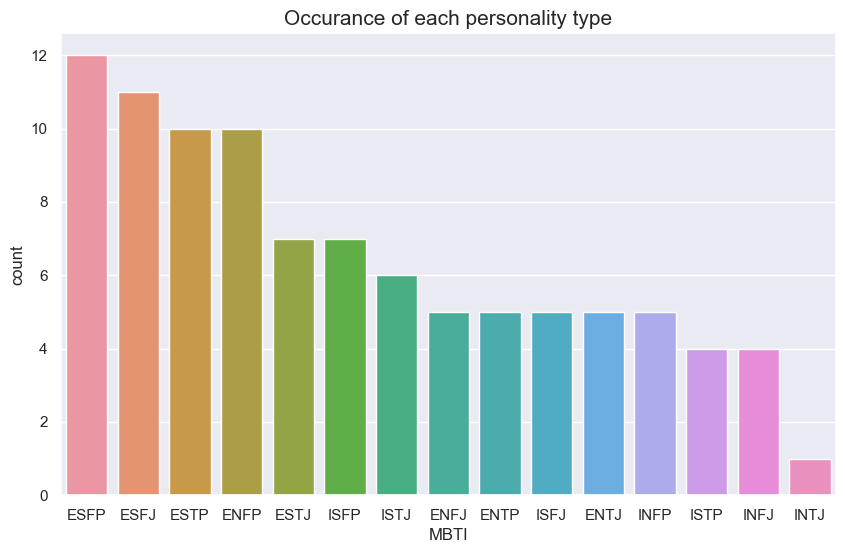

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='MBTI', data = df, order = df['MBTI'].value_counts().index)
ax.set_title('Occurance of each personality type',fontsize=15)
plt.show()

It can be seen in the plot above that the extroverts take the first 5 places with the highest count. The most popular peronality type is ESFP, the last popular - INTJ. 

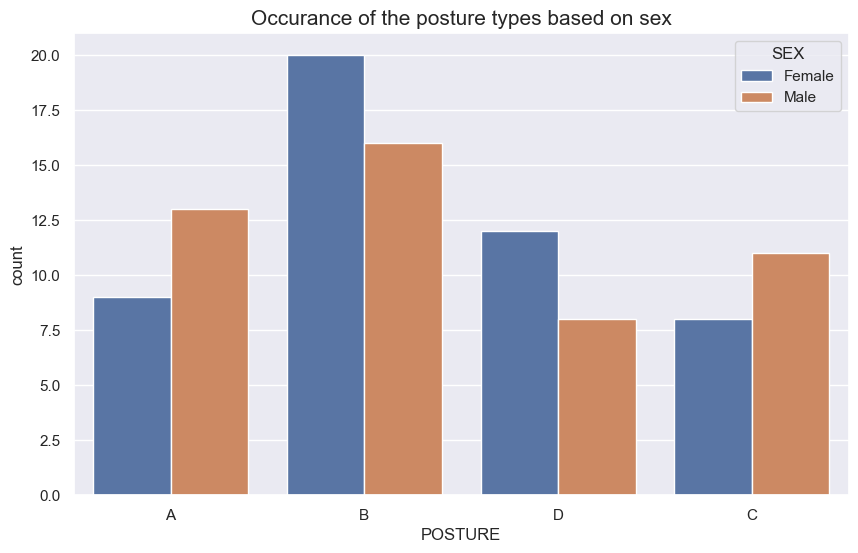

In [9]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='POSTURE', data = df, hue='SEX')
ax.set_title('Occurance of the posture types based on sex',fontsize=15)
plt.show()

From the plot, it can be inferred that men have better posture compared to women. However, the prevalence of other posture types, such as kyphosis-lordosis and sway-back, is higher in women than in men. Only the flat back posture is more prevalent among men.

Now let's explore the differences between the introverts and the extroverts. 

In [10]:
extroverts = df[df["E"] > df["I"]]
introverts = df[df["I"] >= df["E"]]

/var/folders/j2/mzg4562d1tldwwf84136fq8h0000gn/T/ipykernel_7987/2810295297.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


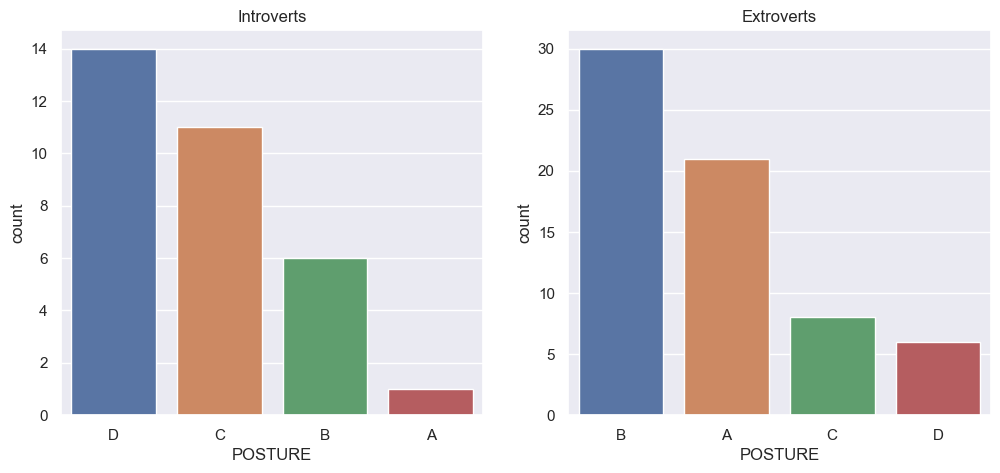

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

sns.countplot( x = introverts['POSTURE'], ax=ax[0],  order = introverts['POSTURE'].value_counts().index)
ax[0].set_title('Introverts')

sns.countplot( x = extroverts['POSTURE'], ax=ax[1], order = extroverts['POSTURE'].value_counts().index)
ax[1].set_title('Extroverts')

fig.show()

It is interesting to see that in general, introverts have worse posture than extroverts. It can be caused by many factors, for example how one spends free time, the level of activity, seeking out social situations and lifestyle habits. 
Now let's have a look at the correlation between posture and activity level.

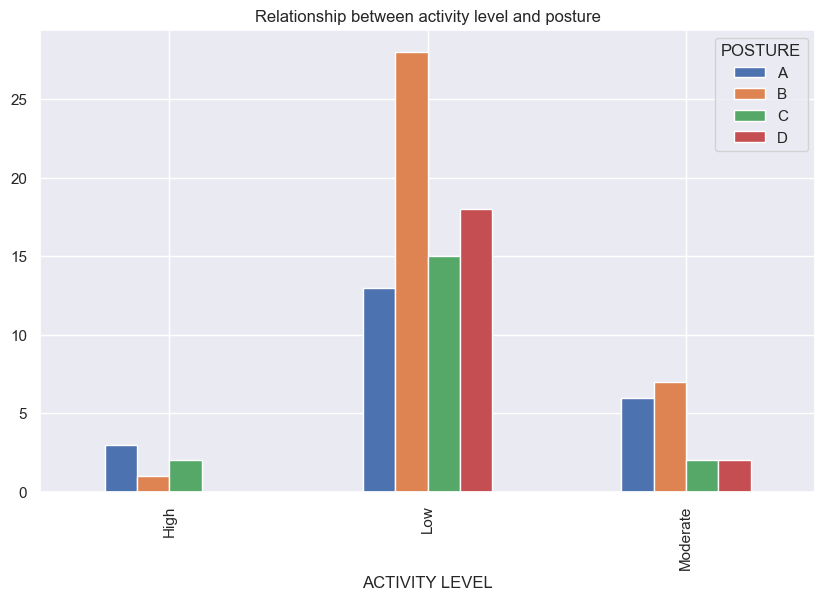

In [12]:
grouped = df.groupby(['ACTIVITY LEVEL', 'POSTURE']).size().unstack()
grouped.plot(kind='bar',figsize=(10,6),title='Relationship between activity level and posture')
plt.show()

From the plot above it can be infered that low activity may result in bad posture, especially kyphosis-lordosis, sway back and flat back. However, a lot of people have also vera good poster with low activity level. High activity level helps with keeping good posture, however not particualry.  

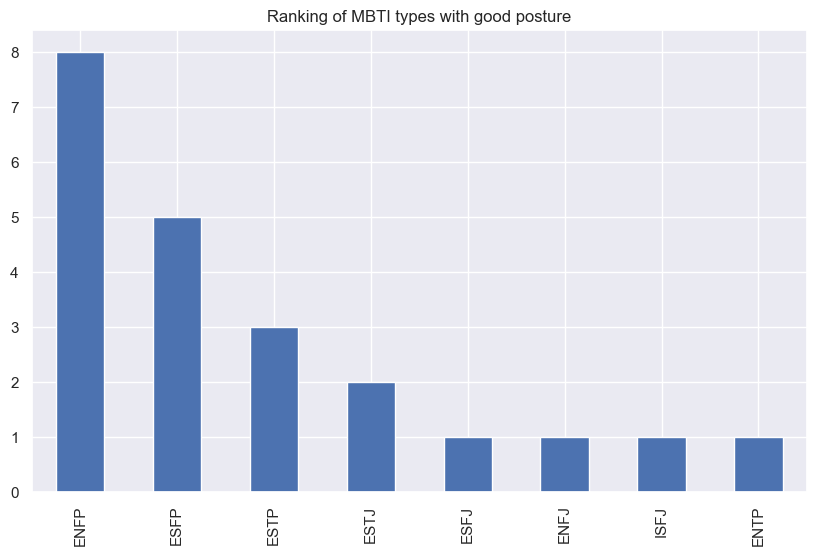

In [13]:
plt.figure(figsize=(10,6))
plt.title("Ranking of MBTI types with good posture")
df[df["POSTURE"] == "A"].MBTI.value_counts().plot.bar()
plt.show()

As one can see in the plot above, there is the highest number of people with a good posture who have an ENFP personality type. There is only one personality from introvetrs group which has a good posture: ISFJ, which is actually my personality type). 

<AxesSubplot: title={'center': 'Ranking of MBTI types with kyphosis-lordosis'}>

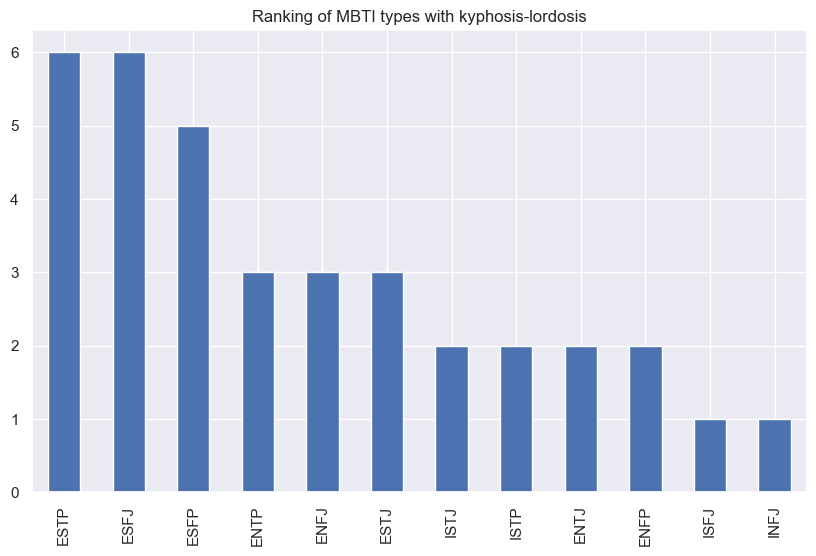

In [14]:
plt.figure(figsize=(10,6))
plt.title("Ranking of MBTI types with kyphosis-lordosis")
df[df["POSTURE"] == "B"].MBTI.value_counts().plot.bar()

Most people with ESTP and ESFJ personality types have hyphosis-lordosis. 

<AxesSubplot: title={'center': 'Ranking of MBTI types with flat back'}>

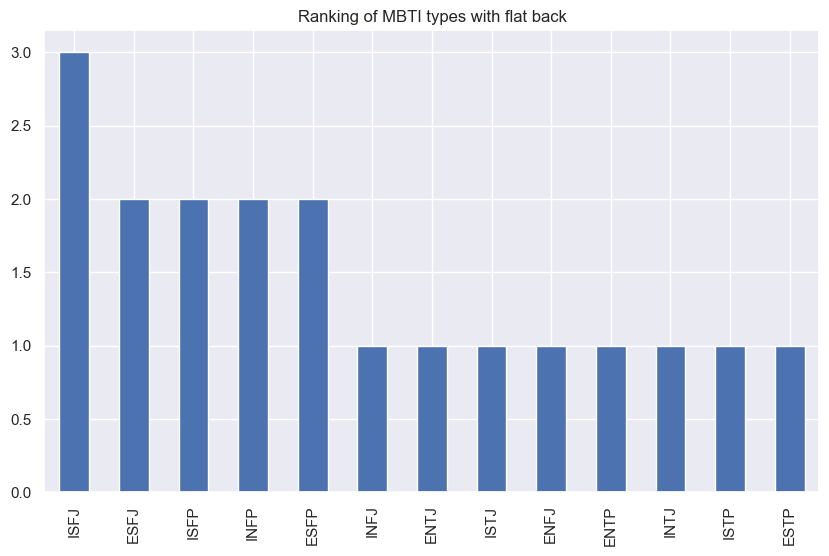

In [15]:
plt.figure(figsize=(10,6))
plt.title("Ranking of MBTI types with flat back")
df[df["POSTURE"] == "C"].MBTI.value_counts().plot.bar()

On the plot above we can see that the most people with ISFJ peronality type have flat back.

<AxesSubplot: title={'center': 'Ranking of MBTI types with sway back'}>

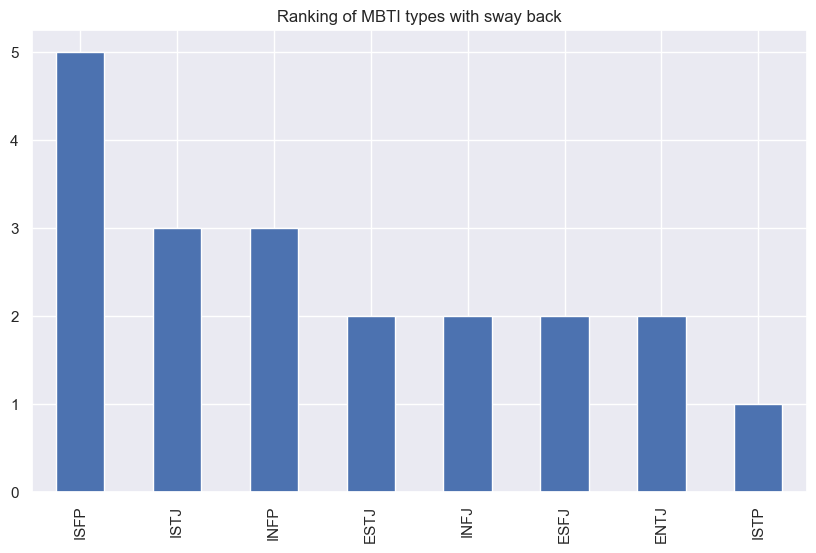

In [16]:
plt.figure(figsize=(10,6))
plt.title("Ranking of MBTI types with sway back")
df[df["POSTURE"] == "D"].MBTI.value_counts().plot.bar()

Here, most people with ISFP type have sway back. 

Now I would like to look at the correlation between the MBTI type and the posture. I will create a small table and then visualise the correlation between the features. 

In [17]:
df2=df[['MBTI','POSTURE']].copy()
df2['count'] = 1
df2=df2.groupby(['MBTI','POSTURE'],as_index=False).sum()
df2=df2.set_index(['MBTI','POSTURE']).unstack()['count']
df2=df2.fillna(0).astype(int)
df2

POSTURE,A,B,C,D
MBTI,,,,
ENFJ,1,3,1,0
ENFP,8,2,0,0
ENTJ,0,2,1,2
ENTP,1,3,1,0
ESFJ,1,6,2,2
ESFP,5,5,2,0
ESTJ,2,3,0,2
ESTP,3,6,1,0
INFJ,0,1,1,2


<AxesSubplot: xlabel='POSTURE', ylabel='MBTI'>

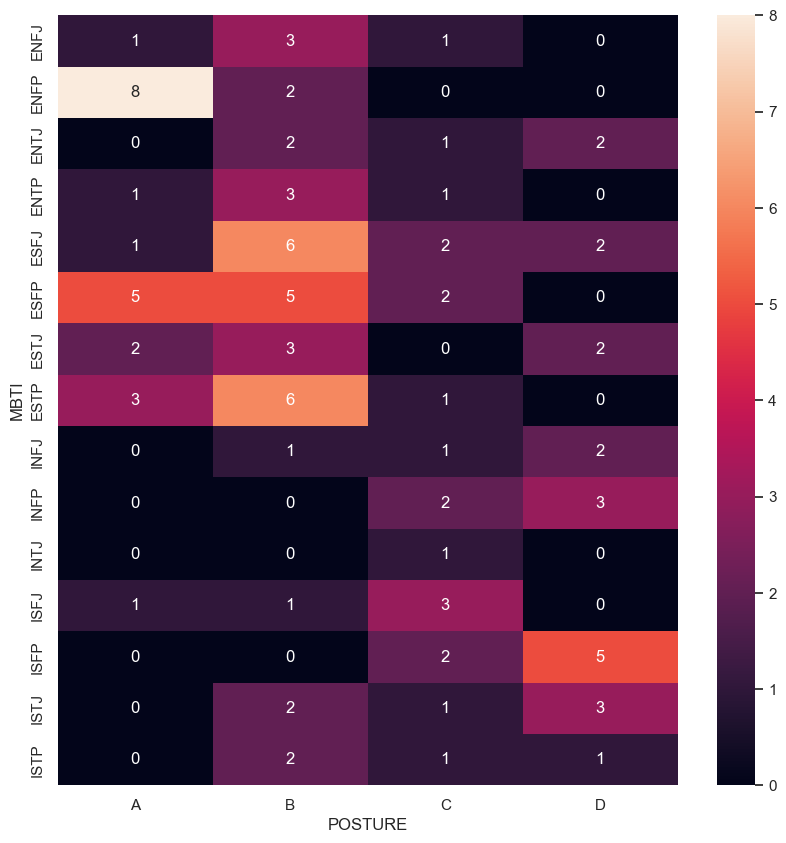

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df2,annot=True)

There is no particual correlation between the MBTI type and the posture. Only in some examples a correlation can be noticed, but it is not too strong. The ENFP personality type shows high correlation with good posture. This means that the MBTI type may not be the best variable to predict the posture. 

### Data Preprocessing
In this step I will perform essential operations on dataset in ordet to prepare it for a machine learning algorythms. 

In [19]:
# importing label encoder 
from sklearn.preprocessing import LabelEncoder

# creating instance of label encoder 
le = LabelEncoder()

# encoding categorical variables
df['SEX']  = le.fit_transform(df['SEX'])
df['MBTI'] = le.fit_transform(df['MBTI'])
df['ACTIVITY LEVEL'] = le.fit_transform(df['ACTIVITY LEVEL'])
df['POSTURE'] = le.fit_transform(df['POSTURE'])

Since 'S No' column is has just index values, I will drop it. It is not needed in the sata set. 

In [20]:
df.drop('S No',axis=1,inplace=True)

In [21]:
df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,53,62,125,0,1,0.0,0.0,0.0,0.0,4,18,3,17,9,9,13,18,4,0
1,52,69,157,1,0,7.0,8.0,5.0,3.0,13,6,15,14,12,21,3,13,9,1
2,30,69,200,1,0,0.0,0.0,0.0,0.0,6,15,6,16,10,15,9,12,10,0
3,51,66,175,1,2,9.5,9.5,9.5,1.5,13,6,15,21,5,13,11,19,3,3
4,45,63,199,0,2,4.0,5.0,2.0,2.0,0,14,7,20,6,9,15,16,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,16,58,100,1,2,0.0,0.0,0.0,3.0,7,19,2,22,4,19,5,2,20,1
93,45,62,134,0,2,0.0,4.0,0.0,0.0,4,11,10,17,9,6,18,13,9,1
94,43,69,188,1,2,2.0,0.0,0.0,0.0,1,12,9,9,17,6,18,2,20,0
95,28,67,180,0,1,0.0,0.0,0.0,0.0,4,11,10,22,14,8,16,14,8,1


In [22]:
df.dtypes

AGE                 int64
HEIGHT              int64
WEIGHT              int64
SEX                 int64
ACTIVITY LEVEL      int64
PAIN 1            float64
PAIN 2            float64
PAIN 3            float64
PAIN 4            float64
MBTI                int64
E                   int64
I                   int64
S                   int64
N                   int64
T                   int64
F                   int64
J                   int64
P                   int64
POSTURE             int64
dtype: object

### Machine Learning: Decision Tree and Random Forest

In [23]:
# importing train_test_split and Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

# assigning the features and the target variable 
X_dt = df.drop('POSTURE',axis=1)
y_dt = df['POSTURE']

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

In [24]:
# creating the model
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fitting the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
# making predictions
predictions = dtree.predict(X_test)

In [26]:
# getting the performance of the model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[4 1 1 1]
 [2 4 1 0]
 [0 1 1 2]
 [0 1 1 0]]
              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.57      0.57      0.57         7
           2       0.25      0.25      0.25         4
           3       0.00      0.00      0.00         2

    accuracy                           0.45        20
   macro avg       0.37      0.35      0.36        20
weighted avg       0.48      0.45      0.47        20



The performance outcome may not have met our expectations as the accuracy is at 45% and the f1-score has only reached 0.62 in one instance.

In [27]:
# random forest

In [28]:
# importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# creating the model
rfc = RandomForestClassifier(n_estimators=300)

In [29]:
# fitting the model
rfc.fit(X_train,y_train)

# making predictions
rfc_pred = rfc.predict(X_test)

# getting the performance
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[2 4 1 0]
 [1 6 0 0]
 [0 2 1 1]
 [0 2 0 0]]
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.43      0.86      0.57         7
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         2

    accuracy                           0.45        20
   macro avg       0.40      0.35      0.33        20
weighted avg       0.48      0.45      0.41        20



From the metrics above it can be infered that the model performed slightly better, but still the outcome is not desirable. 

### Machine Learning: Support Vector Classifier

In [30]:
X_svc = df.drop('POSTURE',axis=1)
y_svc = df['POSTURE']

X_train, X_test, y_train, y_test = train_test_split(X_svc, y_svc, test_size=0.2, random_state=42)

In [31]:
# importing SVC
from sklearn.svm import SVC

# creating a model
model = SVC()

# fitting the model
model.fit(X_train,y_train)

# making predictions
predictions = model.predict(X_test)

# getting the matrics
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[0 7 0 0]
 [0 7 0 0]
 [0 4 0 0]
 [0 2 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.35      1.00      0.52         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.35        20
   macro avg       0.09      0.25      0.13        20
weighted avg       0.12      0.35      0.18        20



/Users/przemyslawgolonka/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/przemyslawgolonka/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/przemyslawgolonka/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In this case, the SVC performed worse than the two prevoius algoritms. 

### Machine Learning: K-Nearest Neighbour

In [32]:
# importing standard scaler to scale the data
from sklearn.preprocessing import StandardScaler

# creating instance of the scaler
scaler = StandardScaler()

# fitting the scaler 
scaler.fit(df.drop('POSTURE',axis=1))

StandardScaler()

In [33]:
# scaling the features
scaled_features = scaler.transform(df.drop('POSTURE',axis=1))

In [34]:
# creating new data set with scaled features
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P
0,0.547913,-1.003699,-0.956237,-0.989743,-0.239470,-0.835831,-1.180447,-0.754816,-0.817641,-0.563189,0.933351,-0.933122,0.388019,-0.433588,-0.283704,-0.084118,1.347962,-1.351831
1,0.487994,0.878929,-0.067566,1.010363,-2.351162,1.899250,1.339572,1.187283,0.151538,1.641582,-1.176203,1.184138,-0.235813,0.203655,1.978158,-1.981663,0.470430,-0.471780
2,-0.830208,0.878929,1.126584,1.010363,-2.351162,-0.835831,-1.180447,-0.754816,-0.817641,-0.073240,0.405962,-0.403807,0.180075,-0.221173,0.847227,-0.843136,0.294923,-0.295770
3,0.428076,0.072089,0.432311,1.010363,1.872221,2.876064,1.812075,2.935172,-0.333051,1.641582,-1.176203,1.184138,1.219795,-1.283244,0.470250,-0.463627,1.523469,-1.527841
4,0.068566,-0.734752,1.098814,-0.989743,1.872221,0.727072,0.394565,0.022024,-0.171521,-1.543087,0.230166,-0.227369,1.011851,-1.070830,-0.283704,0.295391,0.996949,-0.999811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,-1.669064,-2.079486,-1.650511,1.010363,1.872221,-0.835831,-1.180447,-0.754816,0.151538,0.171735,1.109147,-1.109561,1.427739,-1.495658,1.601181,-1.602154,-1.460141,1.464332
93,0.068566,-1.003699,-0.706298,-0.989743,1.872221,-0.835831,0.079562,-0.754816,-0.817641,-0.563189,-0.297222,0.301946,0.388019,-0.433588,-0.849170,0.864654,0.470430,-0.471780
94,-0.051270,0.878929,0.793333,1.010363,1.872221,-0.054379,-1.180447,-0.754816,-0.817641,-1.298112,-0.121426,0.125508,-1.275532,1.265725,-0.849170,0.864654,-1.460141,1.464332
95,-0.950045,0.341036,0.571165,-0.989743,-0.239470,-0.835831,-1.180447,-0.754816,-0.817641,-0.563189,-0.297222,0.301946,1.427739,0.628483,-0.472193,0.485145,0.645936,-0.647790


In [35]:
# assigning the variables
X_knn = df_feat
y_knn = df['POSTURE']

# splitting the data set
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [36]:
# importing KNN
from sklearn.neighbors import KNeighborsClassifier

# creating instance of KNN with 1 neighbour 
knn = KNeighborsClassifier(n_neighbors=1) 

In [37]:
# fitting the model
knn.fit(X_train,y_train)

# making predictions
pred = knn.predict(X_test)

In [38]:
# getting the performance
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[3 2 2 0]
 [3 1 1 2]
 [0 1 1 2]
 [0 1 1 0]]
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.20      0.14      0.17         7
           2       0.20      0.25      0.22         4
           3       0.00      0.00      0.00         2

    accuracy                           0.25        20
   macro avg       0.22      0.21      0.21        20
weighted avg       0.29      0.25      0.26        20



The performance of this model is really bad. However, I set the value of n_neighbours to 1, which may not be the best fit for this model. I will try to find the best number of neighbours to improve the performance of this model. 

In [39]:
# creating empty list to store error rates
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 
    # avarage of where the predictions are not equal to the correct values

Text(0, 0.5, 'Error rate')

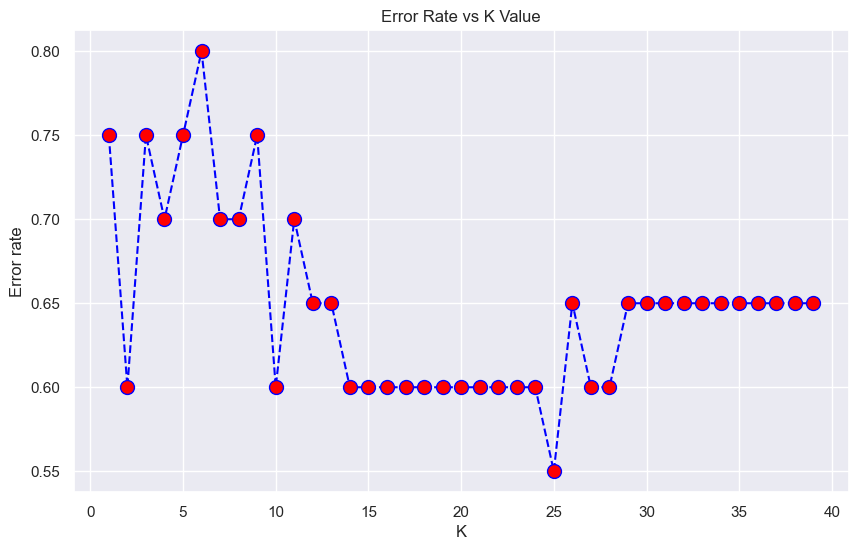

In [40]:
# plotting the results
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error rate')

The smallest error rate is when K equals 25. I will change the number of n_neighbours to 25. 

In [41]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, pred, average='weighted', zero_division=0)

In [42]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))

[[2 4 0 1]
 [0 7 0 0]
 [0 4 0 0]
 [0 2 0 0]]
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.41      1.00      0.58         7
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.45        20
   macro avg       0.35      0.32      0.26        20
weighted avg       0.49      0.45      0.36        20



/Users/przemyslawgolonka/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/przemyslawgolonka/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/przemyslawgolonka/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

Changing the number of n_neighbours improved the performance, however, the outcome is simmilar to the approaches used prevoiusly. 
I will also use keras and try deep learning in order to get better outcome. 

### Machine Learning: Multiclass classification with Tensorflow

In [43]:
# importing tensor flow 
import tensorflow as tf 

In [44]:
# assigning the features and the target variable 
X = df.drop('POSTURE',axis=1).values
y = df['POSTURE'].values

In [45]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# importing minmax scaler 
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
scaler = MinMaxScaler()

# fitting and transforming the train set
X_train = scaler.fit_transform(X_train)

# transforming the test set
X_test = scaler.transform(X_test)

In [47]:
# importing syntax for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras import optimizers

In [48]:
# checking the shape of X_train
X_train.shape

(77, 18)

In [49]:
# checking the number of classes in target variable
n_classes = len(np.unique(y_test))
n_classes

4

In [50]:
# creating a model 
model = Sequential()

model.add(Dense(18,activation='softmax'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))
model.add(Dropout(0.2))

model.add(Dense(6,activation='softmax'))
model.add(Dropout(0.2))

# adding output layer with 4 units 
model.add(Dense(units=4,activation='softmax'))

# compile the model with adam opitmizer and categorical crossentropy as loss function
model.compile(optimizer='adam',loss='categorical_crossentropy')

Metal device set to: Apple M2


2023-02-17 19:57:55.799947: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-17 19:57:55.800210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [51]:
# importing early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

While running the code, I got some value error and this is why I had to use to_categorical function in order to be sure thaat my code will run without any problem. 

In [52]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [53]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=250,
          batch_size=64,
          callbacks=early_stop)

Epoch 1/250


2023-02-17 19:57:57.520106: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-17 19:57:57.749917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 185ms/step - loss: 1.3753 - val_loss: 1.3871
Epoch 2/250
2/2 [==============================] - 0s 27ms/step - loss: 1.3731 - val_loss: 1.3867
Epoch 3/250
2/2 [==============================] - 0s 27ms/step - loss: 1.3754 - val_loss: 1.3865
Epoch 4/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3602 - val_loss: 1.3860
Epoch 5/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3722 - val_loss: 1.3854
Epoch 6/250
1/2 [==============>...............] - ETA: 0s - loss: 1.3702

2023-02-17 19:57:58.125811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step - loss: 1.3808 - val_loss: 1.3849
Epoch 7/250
2/2 [==============================] - 0s 26ms/step - loss: 1.3545 - val_loss: 1.3847
Epoch 8/250
2/2 [==============================] - 0s 26ms/step - loss: 1.3757 - val_loss: 1.3845
Epoch 9/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3698 - val_loss: 1.3844
Epoch 10/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3686 - val_loss: 1.3844
Epoch 11/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3853 - val_loss: 1.3844
Epoch 12/250
2/2 [==============================] - 0s 23ms/step - loss: 1.3556 - val_loss: 1.3844
Epoch 13/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3540 - val_loss: 1.3843
Epoch 14/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3632 - val_loss: 1.3842
Epoch 15/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3536 - val_loss: 1.3841
Epoch 16/250
2/2 [========

In [54]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

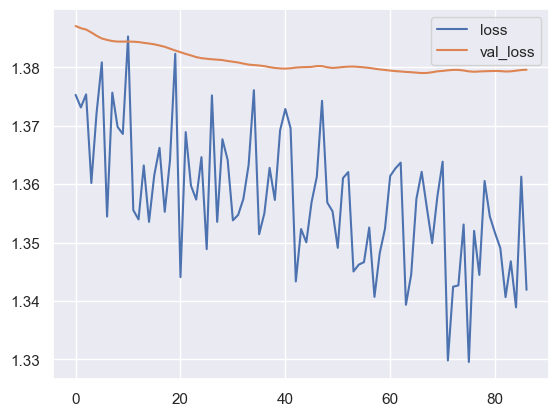

In [55]:
losses[['loss','val_loss']].plot()

By looking at the plot above it can be noticed that the val_loss curve is above the loss curve, which indicates overfitting. 

In [56]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 58ms/step


2023-02-17 19:58:04.980668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [57]:
predictions_categorical = to_categorical(predictions)

In [58]:
from sklearn.metrics import precision_recall_fscore_support

predictions_categorical = np.squeeze(predictions_categorical, axis=-1)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions_categorical, average='weighted', zero_division=0)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Support: ", support)

Precision:  0.295
Recall:  1.0
F1 Score:  0.44781144781144777
Support:  None


In [59]:
# second model 

Since the X and y values were changed by to_categorical method, I decided to create new set of input and target values for each model. Then I will compare the performance of each model. 

In [60]:
X_2 = df.drop('POSTURE',axis=1).values
y_2 = df['POSTURE'].values

In [61]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [62]:
# importing minmax scaler 
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
scaler = MinMaxScaler()

# fitting and transforming the train set
X_train = scaler.fit_transform(X_train)

# transforming the test set
X_test = scaler.transform(X_test)

In [63]:
# creating a model 
model_2 = Sequential()

model_2.add(Dense(18,activation='softmax'))
model_2.add(Dropout(0.2))

model_2.add(Dense(18,activation='softmax'))
model_2.add(Dropout(0.2))

model_2.add(Dense(18,activation='softmax'))
model_2.add(Dropout(0.2))

model_2.add(Dense(18,activation='softmax'))
model_2.add(Dropout(0.2))

# adding output layer with 4 units 
model_2.add(Dense(units=4,activation='softmax'))

# compile the model with adam opitmizer and categorical crossentropy as loss function
model_2.compile(optimizer='adam',loss='categorical_crossentropy')

In [64]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [65]:
model_2.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=250,
          batch_size=64,
          callbacks=early_stop)

Epoch 1/250
1/2 [==============>...............] - ETA: 0s - loss: 1.3937

2023-02-17 19:58:12.516983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 152ms/step - loss: 1.4014 - val_loss: 1.3673
Epoch 2/250
2/2 [==============================] - 0s 29ms/step - loss: 1.3946 - val_loss: 1.3670
Epoch 3/250
2/2 [==============================] - 0s 27ms/step - loss: 1.3845 - val_loss: 1.3669
Epoch 4/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3931 - val_loss: 1.3668
Epoch 5/250
2/2 [==============================] - 0s 23ms/step - loss: 1.3916 - val_loss: 1.3668
Epoch 6/250
1/2 [==============>...............] - ETA: 0s - loss: 1.3954

2023-02-17 19:58:12.773107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step - loss: 1.3950 - val_loss: 1.3669
Epoch 7/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3886 - val_loss: 1.3669
Epoch 8/250
2/2 [==============================] - 0s 23ms/step - loss: 1.3908 - val_loss: 1.3667
Epoch 9/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3908 - val_loss: 1.3666
Epoch 10/250
2/2 [==============================] - 0s 28ms/step - loss: 1.3975 - val_loss: 1.3665
Epoch 11/250
2/2 [==============================] - 0s 25ms/step - loss: 1.3964 - val_loss: 1.3664
Epoch 12/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3913 - val_loss: 1.3663
Epoch 13/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3887 - val_loss: 1.3662
Epoch 14/250
2/2 [==============================] - 0s 21ms/step - loss: 1.3834 - val_loss: 1.3662
Epoch 15/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3883 - val_loss: 1.3663
Epoch 16/250
2/2 [========

In [66]:
losses2 = pd.DataFrame(model_2.history.history)

<AxesSubplot: >

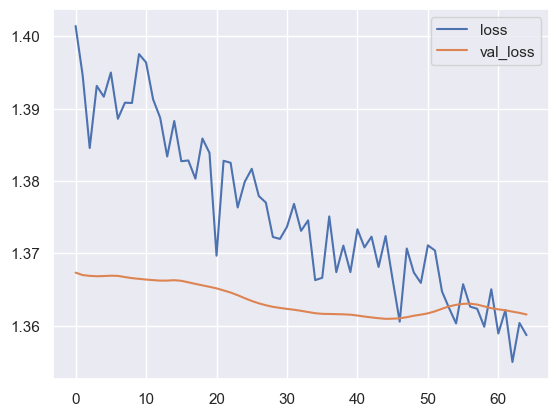

In [67]:
losses2[['loss','val_loss']].plot()

In the plot above, the situation is different: the curves meet at one point around 55 epoch.

In [68]:
predictions2 = model_2.predict(X_test)

1/1 [==============================] - 0s 45ms/step


2023-02-17 19:58:57.518235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [69]:
predictions_categorical_2 = to_categorical(predictions2)

In [70]:
from sklearn.metrics import precision_recall_fscore_support

predictions_categorical_2 = np.squeeze(predictions_categorical_2, axis=-1)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions_categorical_2, average='weighted', zero_division=0)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Support: ", support)

Precision:  0.295
Recall:  1.0
F1 Score:  0.44781144781144777
Support:  None


In [71]:
# third model

In [72]:
X_3 = df.drop('POSTURE',axis=1).values
y_3 = df['POSTURE'].values

In [73]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

In [74]:
# importing minmax scaler 
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
scaler = MinMaxScaler()

# fitting and transforming the train set
X_train = scaler.fit_transform(X_train)

# transforming the test set
X_test = scaler.transform(X_test)

In [75]:
# creating a model 
model_3 = Sequential()

model_3.add(Dense(18,activation='softmax'))
model_3.add(Dropout(0.2))

model_3.add(Dense(12,activation='relu'))
model_3.add(Dropout(0.2))

# adding output layer with 4 units 
model_3.add(Dense(units=4,activation='softmax'))

# compile the model with adam opitmizer and categorical crossentropy as loss function
model_3.compile(optimizer='adam',loss='categorical_crossentropy')

In [76]:
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [77]:
model_3.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          epochs=250,
          batch_size=64,
          callbacks=early_stop)

Epoch 1/250
2/2 [==============================] - ETA: 0s - loss: 1.3880

2023-02-17 19:59:04.576185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-17 19:59:04.758083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 123ms/step - loss: 1.3880 - val_loss: 1.3922
Epoch 2/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3849 - val_loss: 1.3906
Epoch 3/250
2/2 [==============================] - 0s 26ms/step - loss: 1.3860 - val_loss: 1.3892
Epoch 4/250
2/2 [==============================] - 0s 27ms/step - loss: 1.3838 - val_loss: 1.3882
Epoch 5/250
2/2 [==============================] - 0s 23ms/step - loss: 1.3843 - val_loss: 1.3874
Epoch 6/250
2/2 [==============================] - 0s 26ms/step - loss: 1.3807 - val_loss: 1.3865
Epoch 7/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3822 - val_loss: 1.3857
Epoch 8/250
2/2 [==============================] - 0s 28ms/step - loss: 1.3761 - val_loss: 1.3850
Epoch 9/250
2/2 [==============================] - 0s 27ms/step - loss: 1.3790 - val_loss: 1.3843
Epoch 10/250
2/2 [==============================] - 0s 24ms/step - loss: 1.3794 - val_loss: 1.3837
Epoch 11/250
2/2 [============

In [78]:
losses3 = pd.DataFrame(model_3.history.history)

<AxesSubplot: >

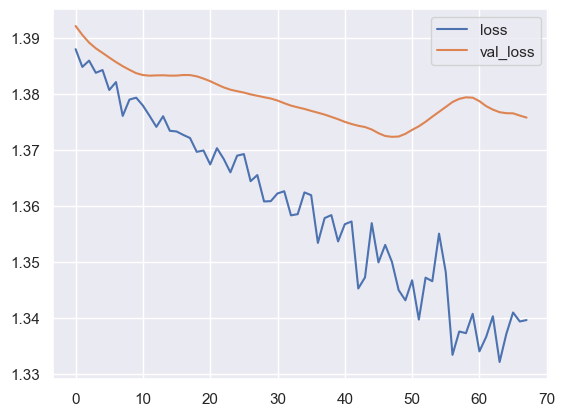

In [79]:
losses3[['loss','val_loss']].plot()

In [80]:
predictions_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 37ms/step


2023-02-17 19:59:27.589212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [81]:
predictions_categorical_3 = to_categorical(predictions_3)

In [82]:
from sklearn.metrics import precision_recall_fscore_support

predictions_categorical_3 = np.squeeze(predictions_categorical_3, axis=-1)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predictions_categorical_3, average='weighted', zero_division=0)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("Support: ", support)

Precision:  0.295
Recall:  1.0
F1 Score:  0.44781144781144777
Support:  None


Despite my efforts to improve the performance of the model using deep learning techniques such as adding more or fewer layers, adjusting the number of neurons, and exploring different activation functions, I have unfortunately not seen a significant improvement in the output. Although I had high hopes that these strategies would yield better results, I have not yet achieved the level of performance I was aiming for.

### Conclusions:
- introverts may be more likely to experience issues with maintaining good posture. 
- extroverts are more likely to exhibit good posture than introverts, there are certainly examples of individuals from both groups who struggle with maintaining proper alignment of the spine.
- men generally exhibit better posture than women, but it is important to note that individual factors such as genetics, lifestyle, and occupation can have a significant impact on one's posture regardless of gender.
- non-active lifestyle can contribute to back problems, but it is not a guarantee. Some individuals who are not very physically active may still have good posture, while others who are more physically active, may have problem with posture.
- there is no strong correlation between personality type and posture. While it is possible that certain personality types may influence posture to some degree, there is no guarantee in that. 
- the decision tree model performed the best.
- the implementing of the deep learning algorithms did not lead to improved model performance. This may be due to the relatively small size of the dataset, which may not have been sufficient to effectively train a deep learning model, as well as the lack of a strong correlation between the predictor variables and the target variable.

### References:
1. Introduction: Kaggle 'Correlation between posture and personality trait'
2. Data set: https://www.kaggle.com/datasets/dhanasekarjaisankar/correlation-between-posture-personality-trait